# HW 05-2. Simple Hypothesis Testing using Simulation / $t$-test

##T1. Mind Reader
Jin claims he can read minds. His friend Pedro asked him to guess a number he was thinking of between 1 and 7 (inclusive). Jin guessed Pedro's number correctly 4 out of 9 times.
Let's test **the hypothesis that Jin cannot read minds and therefore has a chance of $\dfrac{1}{7}$ of guessing the correct number each time** versus *the alternative that his chance is somehow greater*.	

### To Do
* Complete the code below to perform **10000** simulations, each simulating **9** guesses with a chance of $\dfrac{1}{7}$ being correct. 

* Analyze your simulation results and calculate the probability of having **4** or more correct guesses out of **9**. 

* Let's agree that if the observed outcome has a probability less than **1%** under the tested hypothesis, we will reject the hypothesis. What should you conclude regarding the hypothesis?

---
먼저 7개의 숫자 중 하나를 고르면 고른 숫자를 맞추는 상황을 9번 반복하는 테스트를 10000번 실행하였을 때  
Jin이 9번 중 4번 이상 숫자를 맞출 확률은 2.96%이다.  
관측된 결과는 제시된 기준 1%를 넘는 2.96%로 가설을 기각할 수 없다.  

<!--
---
Jin이 마음을 읽을 수 없고 정답을 맞출 확률은 $\frac{1}{7}$이라는 가설을 검정한다.  
표본: 10000개의 상황, 9번  
통계량: Jin이 맞춘 숫자의 수  
귀무가설(H0): Jin이 마음을 읽을 수 없다. 정답을 맞출 확률은 $\frac{1}{7}$이다.  
대립가설(H1): Jin이 마음을 읽을 수 있다. 정답을 맞출 확률은 $\frac{1}{7}$보다 크다.  
유의확률(p-값): Jin이 마음을 읽을 수 없어 정답을 맞출 확률이 $\frac{1}{7}$일 때, 이것 이상으로 극단적인 값이 나올 수 있는 확률   
<br>
마음을 읽을 수 없는데 이러한 표본 평균 변화가 관측될 확률은 15.77%이다.  
마음을 읽을 수 없는데 이러한 표본 평균 증가가 관측될 확률은 7.89%이다.  
따라서 유의 수준을 1%(0.01)로 하였을 때, p-value는 약 0.0789로 귀무가설을 부정할 수 없으며 통계적으로 유의하지 않다.
-->

생성한 표본에서 9번 중 4번 이상 맞을 확률: 2.96%


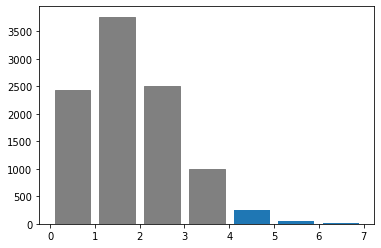

In [39]:
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt

np.random.seed(seed=1000)

n_simulations = 10000
n_sample = 9
p_correct = 1/7

bin_rv = stat.binom(n_sample, p_correct)

rvals = bin_rv.rvs(n_simulations)

print(f"생성한 표본에서 9번 중 4번 이상 맞을 확률: {sum(rvals>=4)/n_simulations*100}%")

#plt.hist(rvals, bins=[0, 4, 7], rwidth=0.8, weights=[0.01]*n_simulations)
#plt.show()
n, bins, patches = plt.hist(rvals, bins=7, rwidth=0.8)
for i in range(4):
  patches[i].set_color("grey")
plt.show()

#result = stat.ttest_1samp(rvals, n_sample * p_correct)
#print("T-test")
#print(result)
#print(f"p-value(p != 1/7): {result.pvalue:.8f}")
#print(f"p-value(p > 1/7): {result.pvalue / 2:.8f}")

## T2. Foot Length

Jun-Hwan found a report suggesting that teenagers' foot lengths are approximately normally distributed with a mean of $24\text{ cm}$ and a standard deviation of $2.6\text{ cm}$. Jun-Hwan wondered if this held true at his school, so he took a random sample of $n=9$ students. The mean foot length of students in his sample was $\bar x=25.6\text{ cm}$  


You want to test $H_0 : \mu = 24 \text{ cm}$  vs.  $H_1 : \mu > 24 \text { cm}$ where $\mu$ is the true mean of teenager's foot length.

### To Do
* Complete the code below to perform **10000** simulations, each simulating **9** lenghts from a normal population with a mean of $24 \text{ cm}$ and standard deviation of $2.6 \text{ cm}$. 
* Based on your simulated results, what is the approxiate $P$-value of the test ? Note the sample result was $\bar x=25.6\text{ cm}$
* Consider 2 significance levels $\alpha_1 = 0.05, \alpha_2 = 0.01$ for the test

---
모집단: 평균 24cm, 표준편차 2.6cm  
표본: 10000개의 상황, 9명  
귀무가설($H_0$): $\mu = 24 \text{ cm}$  
대립가설($H_1$): $\mu > 24 \text { cm}$  

---
생성한 표본에서 9명에 대한 발 길이의 평균이 25.6cm 이상이 나올 확률(p-value)은 3.04%이다.  
관측된 결과는 유의 수준을 5%(0.05)보다 작으므로 귀무가설을 기각하고 대립 가설을 채택할 수 있으며 통계적으로 유의하다.  
그러나 유의 수준을 1%(0.01)로 하면 관측된 결과가 유의 수준을 넘어서므로 귀무가설을 기각할 수 없으며 통계적으로 유의하다고 할 수 없다. 

<!--
---
발 길이의 평균이 24cm일 때 이러한 표본 평균 발 길이에 변화가 관측될 확률은 39.50%이며,  
발 길이의 평균이 24cm일 때 이러한 표본 평균 발 길이에 증가가 관측될 확률은 19.75%이다.  
따라서 유의 수준을 5%(0.05)로 하였을 때, p-value는 약 0.1975로 귀무가설을 기각할 수 없으며 통계적으로 유의하지 않다.  
마찬가지로 유의 수준을 1%(0.01)로 하였을 때, p-value는 약 0.1975로 귀무가설을 기각할 수 없으며 통계적으로 유의하지 않다.  
-->

생성한 표본에서 9명에 대한 발 길이 평균이 25.6cm 이상인 확률: 3.040000%


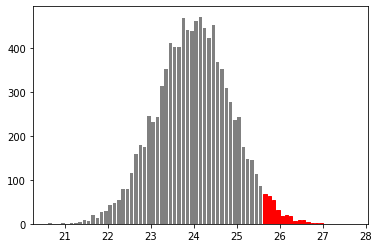

In [63]:
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt

np.random.seed(seed=1000)

n_simulations = 10000
mu = 24
sigma = 2.6
n_sample = 9

n_rv = stat.norm(mu, sigma)

rvals_array = n_rv.rvs(n_simulations*n_sample).reshape(n_simulations, n_sample)

xbars = rvals_array.mean(1)

print(f"생성한 표본에서 9명에 대한 발 길이 평균이 25.6cm 이상인 확률: {sum(xbars>=25.6)/n_simulations * 100:.6f}%")
n, bins, patches = plt.hist(xbars, np.arange(round(xbars.min(), 1), round(xbars.max(), 1), 0.1), rwidth=0.8, color="grey")
for i, p in enumerate(patches):
  if bins[i] >= 25.6:
    p.set_color("red")
plt.show()

#t_stat = (xbars.mean() - 25.6) / math.sqrt(xbars.var()/n_simulations)
#print(t_stat)
#print(stat.ttest_1samp(xbars, 25.6))
#print()

#result = stat.ttest_1samp(xbars, mu)
#print(result)
#print(f"p-value(u != 24): {result.pvalue:.8f}")
#print(f"p-value(u > 24): {result.pvalue / 2:.8f}")

## T3. One-sample $t$-test example - Energy Bar Test

Imagine we have collected a random sample of **31** energy bars from a number of different stores to represent the population of energy bars available to the general consumer. The labels on the bars claim that each bar contains **20** grams of protein.

You can find the actual protein contained in the collected energy bars in the variable -"ebp_df" in the code below (ebp stands for energy_bar_protein). It shows that some bars have less than 20 grams of protein. Other bars have more. 

You might think that the data support the idea that the labels are correct. Others might disagree. 

We decide to perform one-sample t-test to test the following hypotheses

$H_0 : \mu = 20 $  vs. $H_1 : \mu \ne 20 $

### To DO. 
* What is the degrees of freedom of the sample ?
* Calculate the $t$-statistic and the $P$-value of the sample by completing the code below
* For 2 significance levels $\alpha_1 = 0.05, \alpha_2 = 0.01$ for the test, what should you conclude regarding the hypothesis?


---

모집단: 평균 20g  
표본: 31개  
귀무가설($H_0$): $\mu = 20$  
대립가설($H_1$): $\mu \ne 20$  

---

생성한 표본의 자유도는 $31 - 1 = 30$이다.  
에너지 바에 함유된 단백질의 평균이 20g일 때 표본 평균 단백질 변화가 관측될 확률은 0.46%이다.  
따라서 유의 수준을 5%(0.05)로 하였을 때, p-value는 약 0.0046으로 귀무가설을 기각하며 대립가설 $\mu \ne 20$는 통계적으로 유의하다.  
마찬가지로 유의 수준을 1%(0.01)로 하였을 때, p-value는 약 0.0046이며 귀무가설을 기각하고 대립가설 $\mu \ne 20$는 통계적으로 유의하다.

         protein
count  31.000000
mean   21.400000
std     2.541669
min    16.260000
25%    19.865000
50%    21.100000
75%    22.385000
max    27.460000
생성한 표본의 자유도: 30
3.066831635284074


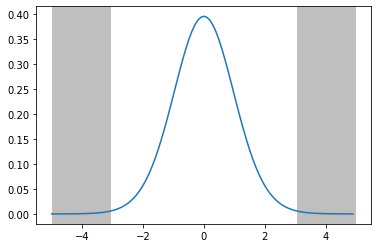

Ttest_1sampResult(statistic=array([3.06683164]), pvalue=array([0.00455262]))


In [51]:
import pandas as pd
import scipy.stats as stat
import math

ebp_df = pd.DataFrame(data=[20.7, 27.46, 22.15, 19.85, 21.29, 24.75, 20.75, 
                               22.91, 25.34, 20.33, 21.54, 21.08, 22.14, 19.56, 
                               21.1, 18.04, 24.12, 19.95, 19.72, 18.28, 16.26, 
                               17.46, 20.53, 22.12, 25.06, 22.44, 19.08, 19.88, 
                               21.39, 22.33, 25.79], columns=['protein'])
print(ebp_df.describe())
sample = ebp_df["protein"]
print(f"생성한 표본의 자유도: {sample.count() - 1}")

t_stat = (sample.mean()-20)/math.sqrt(sample.var()/sample.count())
print(t_stat)

tc = stat.t(df = sample.count() - 1)
x = np.arange(-5, 5, 0.1)
plt.plot(x, tc.pdf(x))
plt.axvspan(-5, -t_stat, facecolor="grey", alpha=0.5)
plt.axvspan(t_stat, 5, facecolor="grey", alpha=0.5)
plt.show()

result1 = stat.ttest_1samp(ebp_df, 20)
print(result1)

## T4. One-Sample $t$-test Example - Height Test

According to [KOSIS(KOrean Statistical Information Service : 국가통계포털)](https://kosis.kr/statHtml/statHtml.do?orgId=350&tblId=DT_35007_N130), 
the mean height of Korean men aged 20-29 years is about 174.21 cm in 2019.

We got a sample of heights from 21 male students from PNU which is shown in the code below. The sample mean is a little higher than the mean height of Korean men aged 20-29. Let's test if the mean height of students at PNU is significantly taller than 174.21 using the one-sample $t$ test. The null and alternative hypotheses of this test will be:

$H_0 : \mu = 174.21$ vs. $ H_1 : \mu > 174.21 $

### To DO. 
* Calculate the $t$-statistic and the $P$-value of the sample by completing the code below
* For 2 significance levels $\alpha_1 = 0.1, \alpha_2 = 0.05$ for the test, what should you conclude regarding the hypothesis?
* Calculate confidence intervals for the mean height for 2 confidence levels 90% and 95%
---

모집단: 평균 174.21cm  
표본: 21명  
귀무가설($H_0$): $\mu = 174.21$  
대립가설($H_1$): $\mu > 174.21$  

---
키의 평균이 174.21일 때, 표본 평균 키의 변화가 관측될 확률은 13.71%이다.  
키의 평균이 174.21일 때, 표본 평균 키의 증가가 관측될 확률은 6.86%이다.  
<br>
유의수준을 10%(0.1)로 하였을 때, p-value는 약 0.0686으로 귀무가설을 기각하고 대립가설 $\mu > 174.21$는 통계적으로 유의하다.  
유의수준을 5%(0.05)로 하였을 때, p-value는 약 0.0686으로 귀무가설을 기각할 수 없으며 통계적으로 유의하지 않다.  
<br>
신뢰 수준 95%에서 평균 키의 신뢰 구간은 173.90cm ~ 179.99cm,  
신뢰 수준 90%에서 평균 키의 신뢰 구간은 173.26cm ~ 180.62cm가 된다.

           height
count   21.000000
mean   176.942857
std      8.086076
min    164.730000
25%    169.020000
50%    176.750000
75%    182.540000
max    190.100000


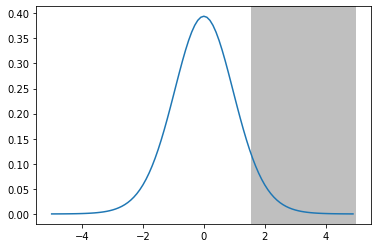

Ttest_1sampResult(statistic=1.5487764538003106, pvalue=0.1371147767087939)
p-value(u!=174.21): 0.13711478
p-value(u >174.21): 0.06855739
CI(a1 = 0.1) : [173.89954605 179.98616824]
CI(a2 = 0.05): [173.2621193  180.62359499]


In [59]:
import pandas as pd
import scipy.stats as stat
import math

mu = 174.21

sample_df = pd.DataFrame(data=[180.32, 178.71, 168.59, 176.30, 169.02,
 168.76, 187.58, 188.54, 173.90, 177.67, 182.54, 178.34, 189.83, 171.16, 
 190.10, 176.75, 166.24, 175.25, 184.69, 164.73, 166.78], columns=['height'])

print(sample_df.describe())
sample = sample_df["height"]
rv_t = stat.t(sample.count() - 1)
result = stat.ttest_1samp(sample, mu)
x = np.arange(-5, 5, 0.1)
plt.plot(x, rv_t.pdf(x))
plt.axvspan(result.statistic, 5, facecolor="grey", alpha=0.5)
plt.show()
print(result)
print(f"p-value(u!=174.21): {result.pvalue:.8f}")
print(f"p-value(u >174.21): {result.pvalue / 2:.8f}")
a1 = 0.1
a2 = 0.05
print(f"CI(a1 = 0.1) : {sample.mean() + np.array(rv_t.interval(1 - a1)) * math.sqrt(sample.var()/sample.count())}")
print(f"CI(a2 = 0.05): {sample.mean() + np.array(rv_t.interval(1 - a2)) * math.sqrt(sample.var()/sample.count())}")